# Lab 2 - Part 1

Data analysis and graph generation for part one of Lab 2

In [19]:
import json
import pandas
import seaborn
import numpy
import matplotlib.pyplot as plt
from gzip import open as gzopen

# The sample data contains two runs, one at 32 seconds and another at 64 seconds. 
with gzopen("lab-3-mode-serial-procs-512-batches-8.json.gz", "r") as ifs:
    data = ifs.read().decode("utf-8")
data = json.loads(data)
print(data.keys())
with gzopen("lab-3-mode-threaded-procs-128-batches-2.json.gz", "r") as ifs:
    new_data = ifs.read().decode("utf-8")
new_data = json.loads(new_data)

# Combine the two results together
data.update(new_data)
print("Number of processes run:", len(data))
items = []
endings = set()
for key, val in data.items():
    for old in val:
        for sub_key in old.keys():
            if "." in old[sub_key]:
                old[sub_key] = float(old[sub_key])
            else:
                try:
                    old[sub_key] = int(old[sub_key])
                except Exception:
                    pass
        old["run"] = key
        items.append(old)
frame = pandas.DataFrame(items)


dict_keys(['serial'])
Number of processes run: 2


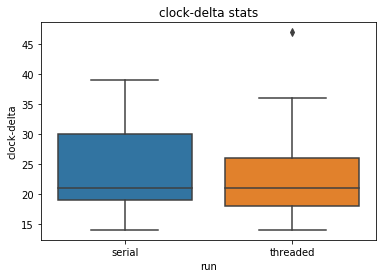

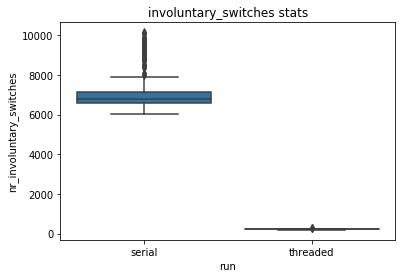

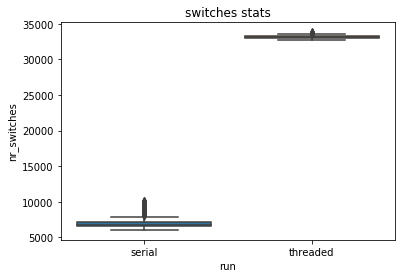

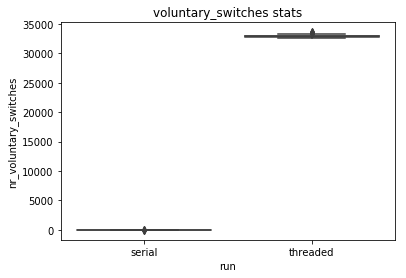

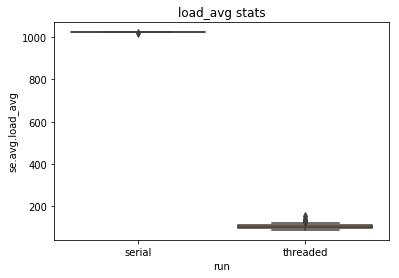

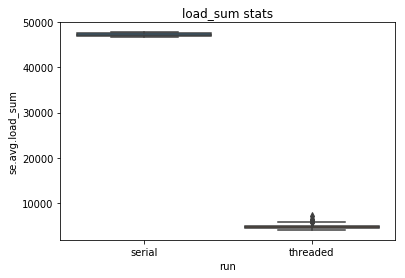

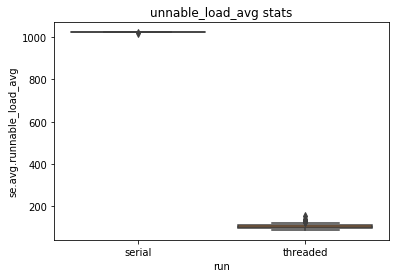

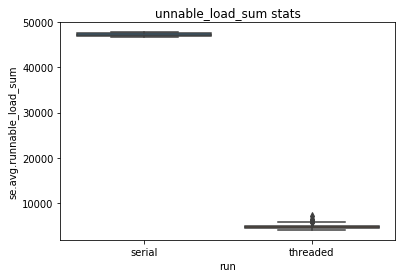

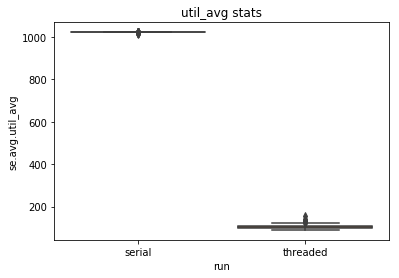

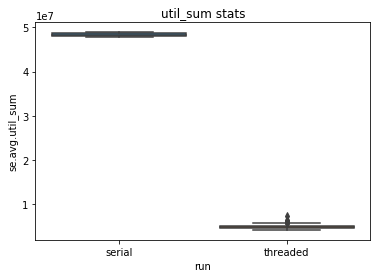

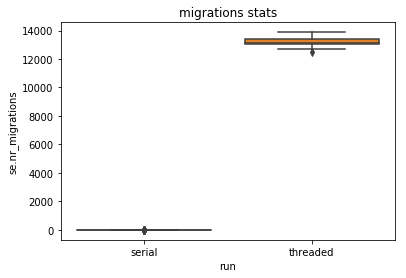

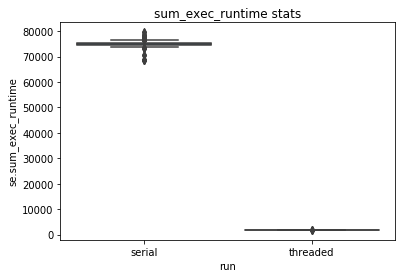

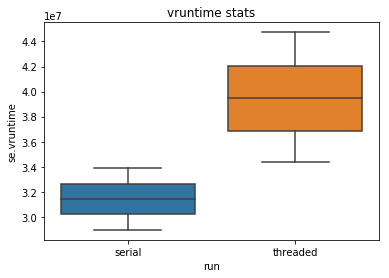

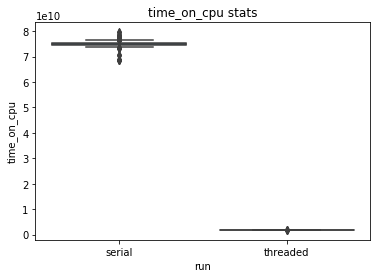

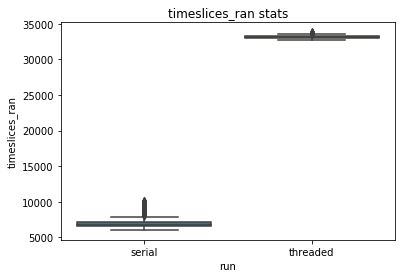

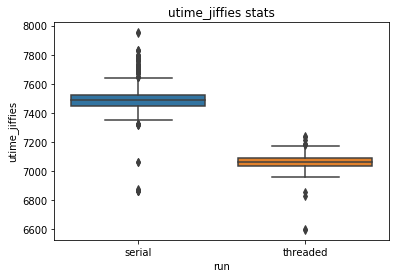

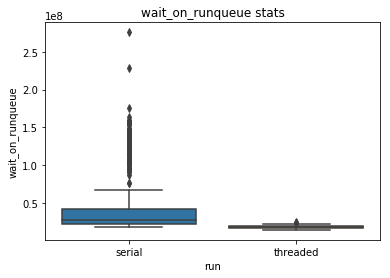

In [20]:
for idx, key in enumerate(frame.columns):
    if key in ["se.avg.last_update_time", "se.exec_start",]:
        continue
    if not isinstance(frame[key][0], (float, int, numpy.int64, numpy.float64)):
        continue
    if not frame[key][0]:
        continue
    subframe = frame.copy()
    if len(getattr(subframe, key).unique()) == 1:
        continue
    try:
        figure, axes = plt.subplots(nrows=1)
        axes.set_title("{} stats".format(key.split(".")[-1]).strip("nr_"))
        seaborn.boxplot(x="run", y=key, data=subframe, ax=axes)
        figure.show()
    except Exception:
        pass